<a href="https://colab.research.google.com/github/Sufyanahmad786/Sufyanahmad786/blob/main/Heart_Disease_Predication_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Predication Projects**
Developer: Sufyan Ahmad


### **About The Dataset**

## **Context**
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### **Content**
#### Column Descriptions:
* 'id'(Unique id for each patient)

**age** (Age of the patient in years)

**origin** (place of study)

**sex** (Male/Female)

**cp chest pain type** ([typical angina, atypical angina, non-anginal, asymptomatic])

**trestbps resting blood pressure** (resting blood pressure (in mm Hg on admission to the hospital))

**chol** (serum cholesterol in mg/dl)

**fbs** (if fasting blood sugar > 120 mg/dl)

**restecg** (resting electrocardiographic results)

-- Values: [normal, stt abnormality, lv hypertrophy]

**thalach**: maximum heart rate achieved

**exang**: exercise-induced angina (True/ False)

**oldpeak**: ST depression induced by exercise relative to rest

**slope**: the slope of the peak exercise ST segment

**ca**: number of major vessels (0-3) colored by fluoroscopy

**thal**: [normal; fixed defect; reversible defect]

**num**: the predicted attribute

**Acknowledgements**
### **Creators:**
Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
### **Relevant Papers:**
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
Web Link
David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. Web Link
Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

In [ ]:
%%time
# Install LIbirires
# Import LIbirires
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Visulization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer

#Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Pipeline
from sklearn.pipeline import Pipeline

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

CPU times: user 109 µs, sys: 0 ns, total: 109 µs
Wall time: 113 µs


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# E**xploratory Data Analysis**

## from Each columns

In [ ]:
df.shape

(920, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


In [ ]:
df['id'].min(), df['id'].max()
# df['age'].min(), df['age'].max()

(1, 920)

<Axes: xlabel='age', ylabel='Count'>

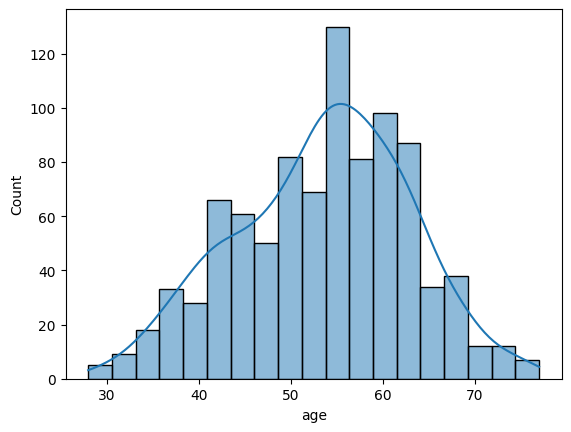

In [ ]:
sns.histplot(df['age'], kde=True)

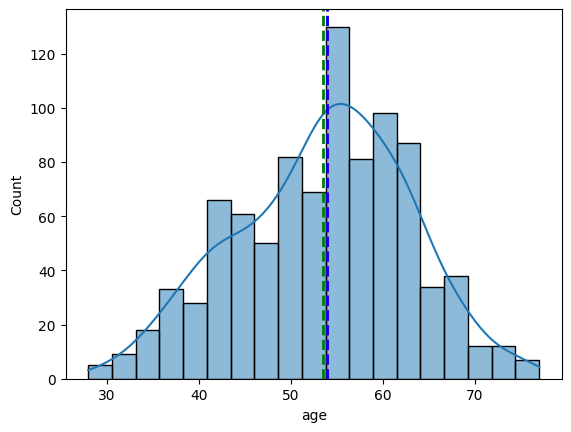

Mean: 53.51086956521739
Median: 54.0
Mode: 54


In [ ]:
# plot the mean, median, and mode age Column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['age'].median(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['age'].mode()[0], color='b', linestyle='dashed', linewidth=2)
plt.show()

# print mean Median and mode age columns
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

 **Lets Explore the gender based distribution of the datasetfor age Column**

In [ ]:
import plotly.express as px
fig = px.histogram(data_frame=df, x='age', color='sex', marginal='rug', opacity=1) # Change 'X' to 'x'
fig.show()

In [ ]:
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [ ]:
# Caculate the percentage value_counts of male and female
male_count = 726
female_count = 194
total_count = male_count + female_count

male_percentage = (male_count / total_count) *100
female_percentage = (female_count / total_count) *100
print(f"Percentage of male: {male_percentage:.2f}%")
print(f"Percentage of female: {female_percentage:.2f}%")

Percentage of male: 78.91%
Percentage of female: 21.09%


In [ ]:
# lets deal with the datasets Columns
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [ ]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


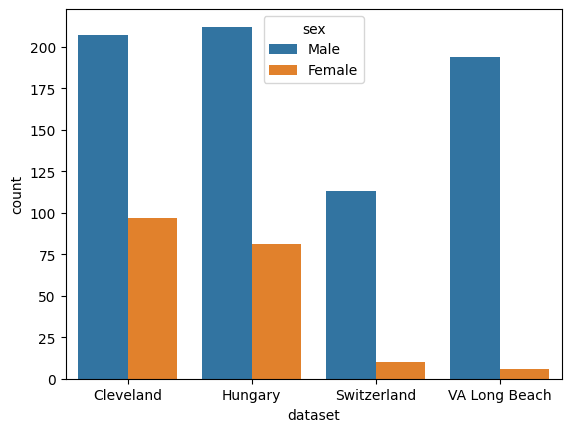

In [ ]:
# plot the complete dataset columns
sns.countplot(x='dataset', data=df, hue = 'sex')

#better Plotly Express plot
fig = px.bar(df, x='dataset', color='sex',  opacity=1) # Remove 'marginal' parameter
fig.show()

#print the value counts of dataset columns for groupby  for sex
print(df.groupby('sex')['dataset'].value_counts()) # Use parentheses for groupby

In [ ]:
# make th plot from plotly for age column and colouring with dataset
fig = px.histogram(data_frame=df, x='age', color='dataset') # Change 'X' to 'x'
fig.show()
# print the mean median and mode ge column groupdy dataset column
print('mean of the dataset:' '\n',df.groupby('dataset')['age'].mean())
print("____________________________________________________")
print('median of the dataset:' '\n',df.groupby('dataset')['age'].median())
print("____________________________________________________")
print('mode of the dataset:' '\n',df.groupby('dataset')['age'].agg(pd.Series.mode))
print("____________________________________________________")

mean of the dataset:
 dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
____________________________________________________
median of the dataset:
 dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
____________________________________________________
mode of the dataset:
 dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
____________________________________________________


**Lets Explore CP (chest pain) Column**

In [ ]:
# value count cp column
df['cp'].value_counts()
# Draw a plot cp column for age groupby column using plotly
fig= px.histogram(data_frame=df, x='age', color='cp')
fig.show()

sex     cp             
Female  asymptomatic        70
        atypical angina     61
        non-anginal         53
        typical angina      10
Male    asymptomatic       426
        non-anginal        151
        atypical angina    113
        typical angina      36
Name: count, dtype: int64

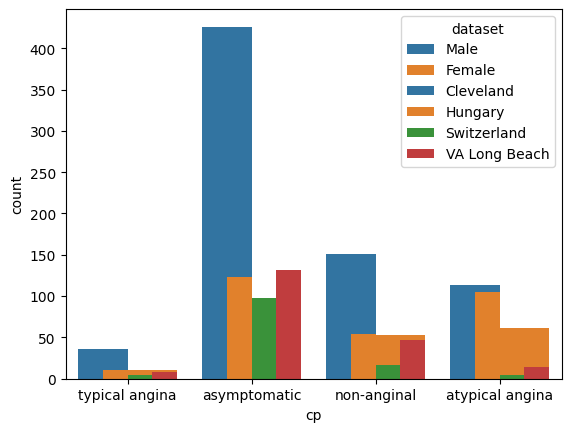

In [ ]:
# count plot cp columns fo sex column
sns.countplot(x='cp', data=df, hue = 'sex')
sns.countplot(x='cp', data=df, hue = 'dataset')
# count CP column as sex
df.groupby('sex')['cp'].value_counts()

## **Lets Explore the trestbps(resting blood pressure) column**
the normal reating blood pressure is 120/80 mm


In [ ]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

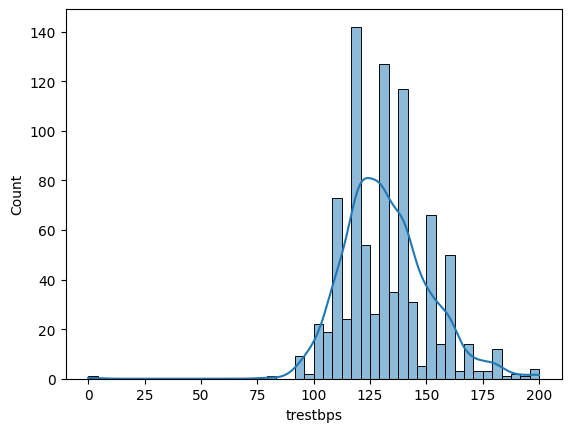

In [ ]:
sns.histplot(df['trestbps'], kde=True)

In [ ]:
# Dealing Missing Values in trestbps column
# the percentage of missing values in trestbps column
print("percentage of missing value in Trestbps columns:", (df['trestbps'].isnull().sum()/len(df))*100, "%")

percentage of missing value in Trestbps columns: 6.41304347826087 %


In [ ]:
# IMPUTE THE MISSING VALUES IN Trestbps COLUMN USING ITRATIVE IMPUTER
# create am object of IterativeImputer class
imputer = IterativeImputer(random_state=42)
# fit and transform the data
df['trestbps'] = imputer.fit_transform(df[['trestbps']])

# check the missing values
df['trestbps'].isnull().sum()

0

In [ ]:
# lets impute the all missing value cloumns
# IMPUTE THE MISSING VALUES IN ca, thalch, oldpreak, chol COLUMNs USING ITRATIVE IMPUTER
# create an object of IterativeImputer class

imputer_2 = IterativeImputer(max_iter=10, random_state=42)
# fit and transform the data
df[['ca', 'thalch', 'oldpeak', 'chol']] = imputer_2.fit_transform(df[['ca', 'thalch', 'oldpeak', 'chol']])

In [ ]:
# let check the other missing values columns
(df.isnull().sum()/len(df) * 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

## **Dealing With Missing values**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

def impute_categorical_with_rf(df, column_name):
    # Step 1: Check if the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame")

    # Step 2: Identify categorical columns
    categorical_cols = df.select_dtypes(include='object').columns.tolist()
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

    # Step 3: Encode categorical columns using Label Encoder
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = df[col].astype(str)
        df[col] = le.fit_transform(df[col].fillna('missing'))
        label_encoders[col] = le

    # Step 4: Separate the dataset into columns with and without the missing values in the specified column
    df_with_missing = df[df[column_name].isna()]
    df_without_missing = df[df[column_name].notna()]

    # Check if there are any rows with missing values
    if df_with_missing.empty:
        print(f"No missing values found in column '{column_name}'. Skipping imputation.")
        return df

    # Step 5: Define features and target for the model
    X_train = df_without_missing.drop(columns=[column_name])
    y_train = df_without_missing[column_name]
    X_test = df_with_missing.drop(columns=[column_name])

    # Step 6: Preprocess the data
    # - Impute missing values in numerical columns
    numerical_transformer = SimpleImputer(strategy='mean')

    # - Impute missing values in categorical columns (these are now integers)
    categorical_transformer = SimpleImputer(strategy='most_frequent')

    # - Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Step 7: Create a pipeline that first preprocesses the data then fits the RandomForestClassifier
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))
    ])

    # Step 8: Fit the model on the available data
    model.fit(X_train, y_train)

    # Step 9: Predict the missing values for the specified column
    y_pred = model.predict(X_test)

    # Step 10: Fill in the missing values in the original DataFrame
    df.loc[df[column_name].isna(), column_name] = y_pred

    # Step 11: Inverse transform the encoded columns back to original values
    for col, le in label_encoders.items():
        df[col] = le.inverse_transform(df[col])

    return df

# Check if the column exists before calling the function
if 'thal' in df.columns:
    df = impute_categorical_with_rf(df, 'thal')

No missing values found in column 'thal'. Skipping imputation.


In [ ]:
df = impute_categorical_with_rf(df, 'thal')

print("missing values in thal column",(df['thal'].isnull().sum()))

No missing values found in column 'thal'. Skipping imputation.
missing values in thal column 0


## **Dealing With Outliers**

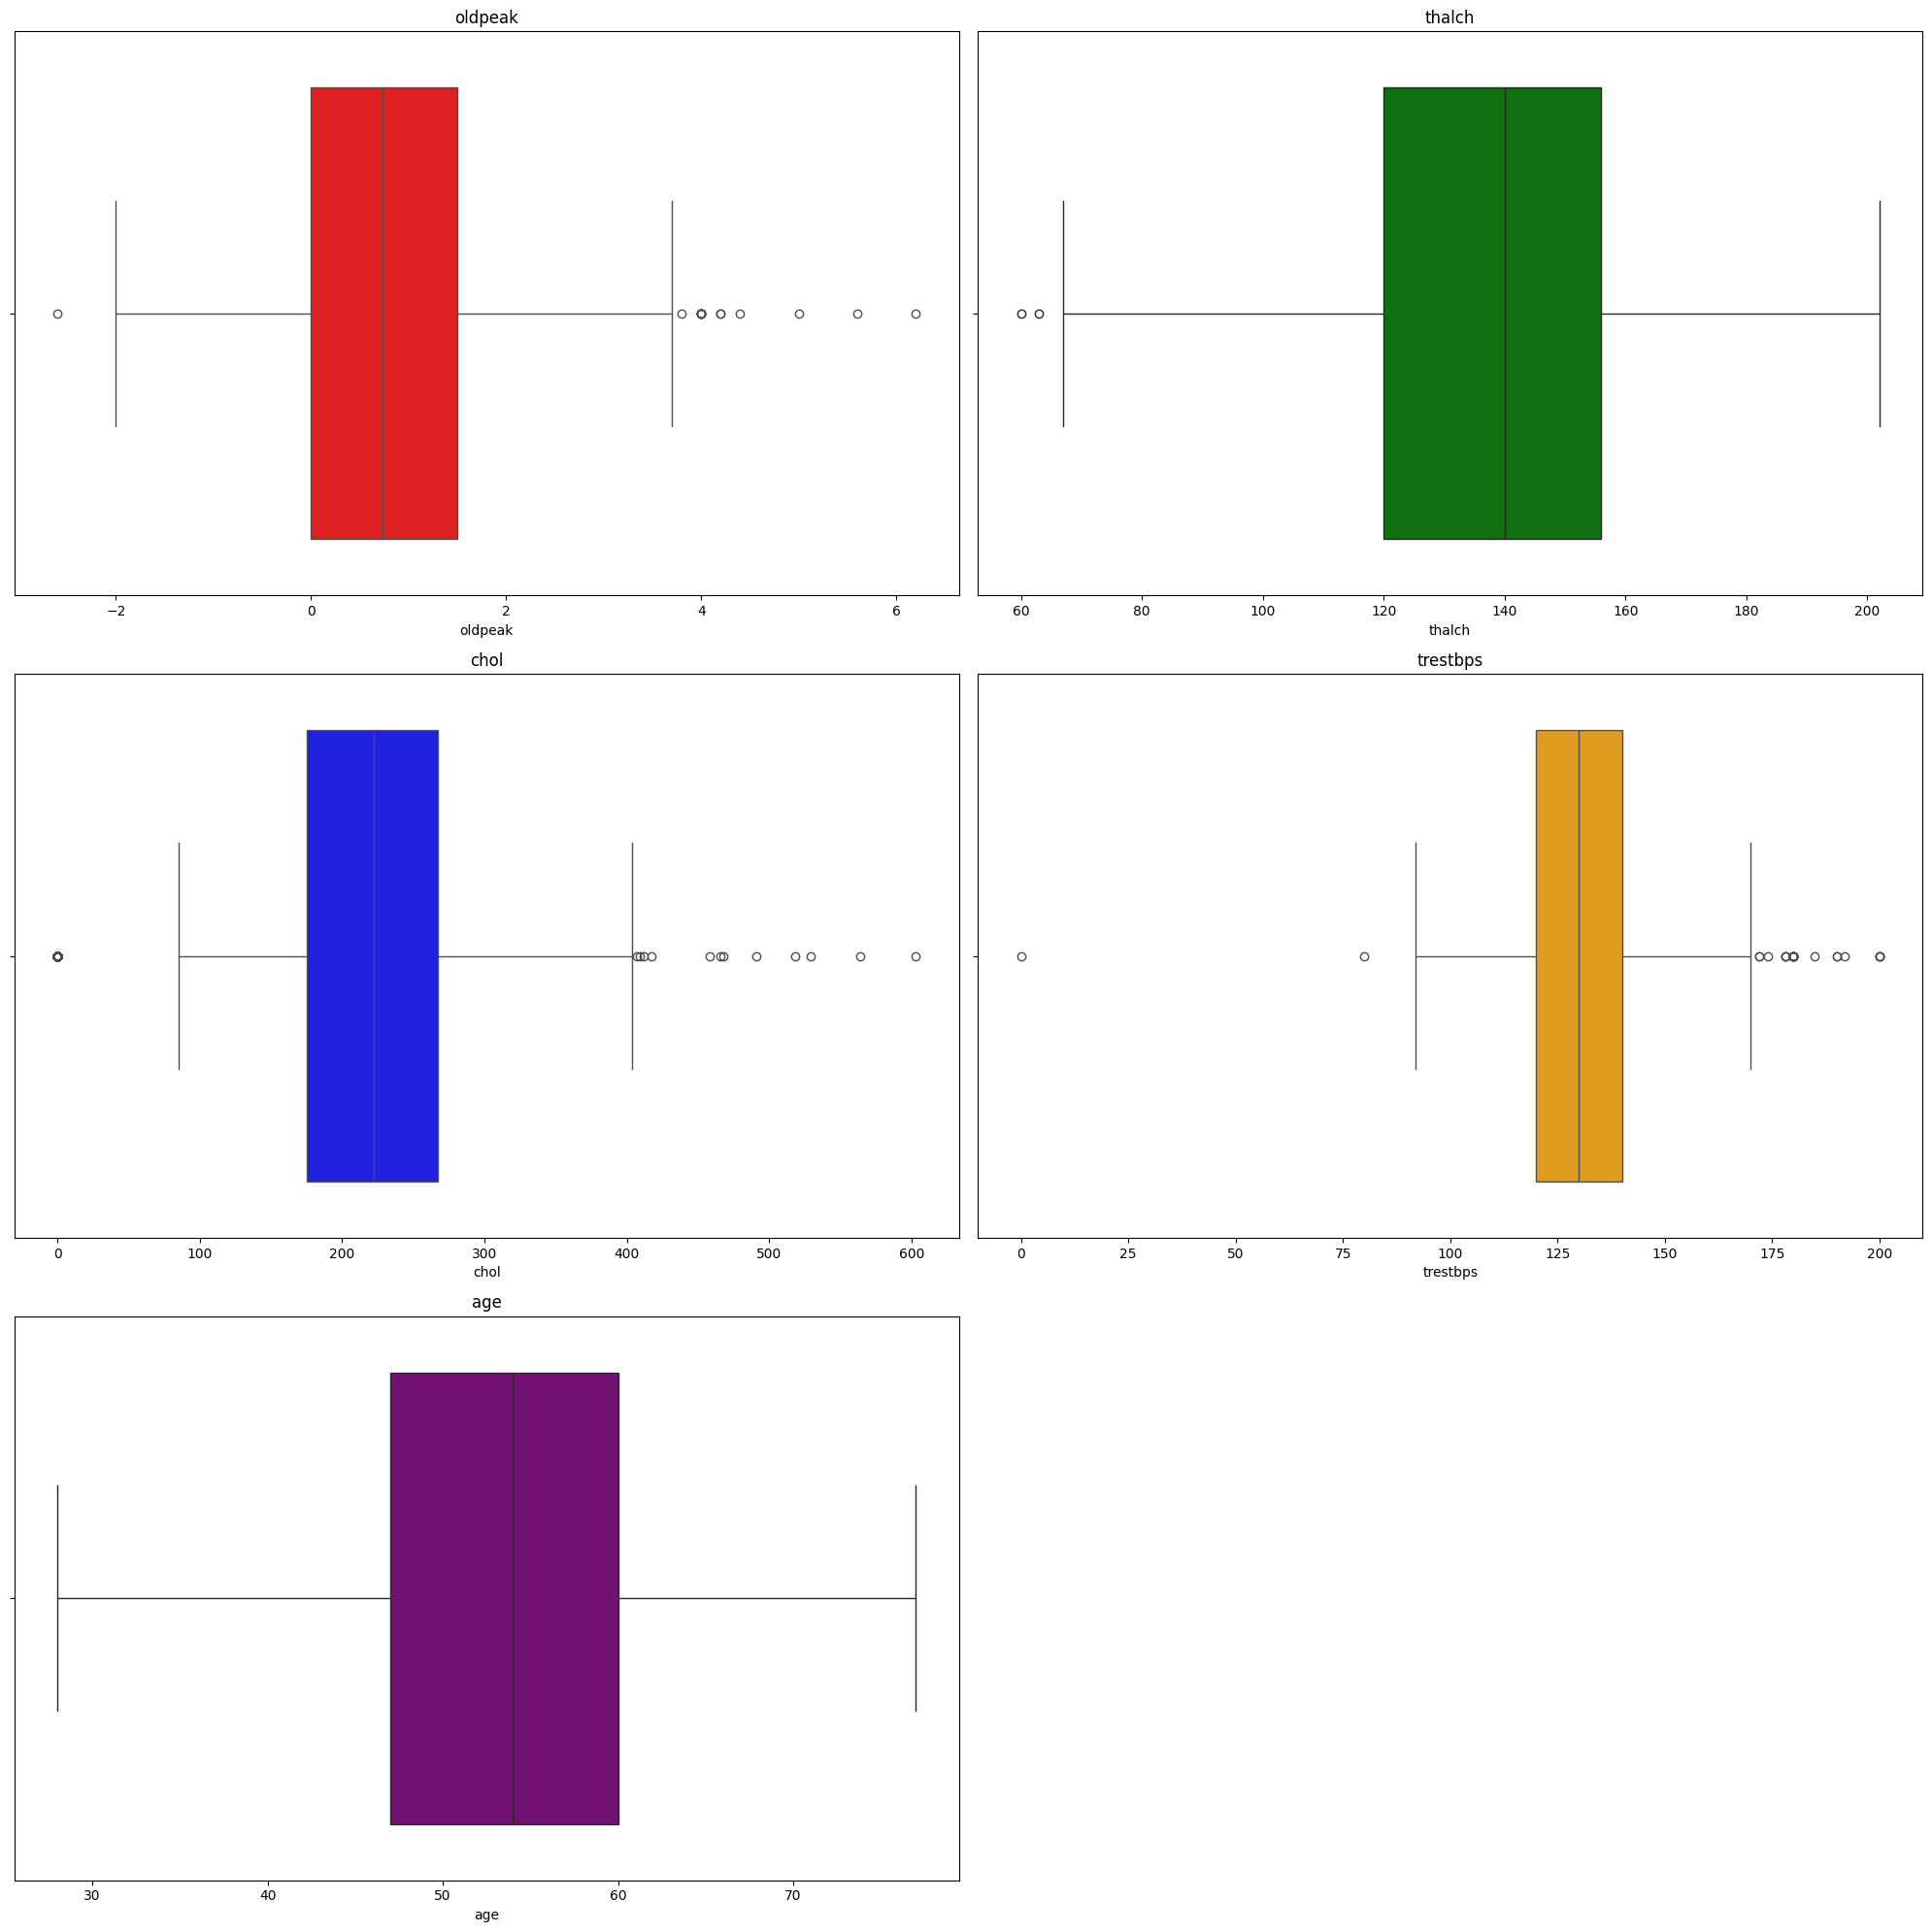

In [ ]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
#  Create the boxplot for all numeric colums using for loop or sub plot
plt.figure(figsize=(20, 20))

colors = ['red','green', 'blue', 'orange', 'purple']


for i, column in enumerate(numeric_cols):
    # Use num_rows instead of hardcoded value 3
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[column], color=colors[i % len(colors)])
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
# make a outline plot for all numeric columns
# fig = px.box(data_frame=df, y=numeric_cols, color_discrete_sequence=colors)
# fig.update_layout(title="Box Plots of Numeric Columns", height=800, width=800)
# fig.show()

fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [ ]:
# print the row from trestbps value is 0
df[df['trestbps'] == 0]

#remove the raw from data
df = df[df['trestbps'] != 0]

In [ ]:
df[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,1,2,3,95.000000,0.0,2,2,127.000000,0,0.700000,3,0.585346,1,1
598,599,34,1,2,0,115.000000,0.0,2,1,154.000000,0,0.200000,3,0.283606,1,1
599,600,35,1,2,0,132.132404,0.0,2,2,130.000000,1,0.757452,2,0.566071,3,3
600,601,36,1,2,0,110.000000,0.0,2,2,125.000000,1,1.000000,1,0.640861,0,1
601,602,38,0,2,0,105.000000,0.0,2,2,166.000000,0,2.800000,3,0.505422,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,1,3,0,122.000000,0.0,0,2,120.000000,0,0.500000,3,0.622004,1,1
819,820,63,1,3,2,130.000000,0.0,1,3,160.000000,0,3.000000,1,0.583685,1,0
822,823,48,1,3,2,102.000000,0.0,2,3,110.000000,1,1.000000,0,0.773462,1,1
839,840,56,1,3,0,132.132404,0.0,0,0,126.212428,2,0.785303,2,0.603066,1,1


In [ ]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

**The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.**

0 = no heart disease

1 = mild heart disease

2 = moderate heart disease

3 = severe heart disease

4 = critical heart disease

In [ ]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

logistic regression

KNN

NB

SVM

Decision Tree

Random Forest

XGBoost

GradientBoosting

AdaBoost

lightGBM




In [ ]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.6376816860465117
Test Accuracy: 0.6376811594202898

Model: Gradient Boosting
Cross-validation Accuracy: 0.6189195736434108
Test Accuracy: 0.6557971014492754

Model: Support Vector Machine
Cross-validation Accuracy: 0.5754602713178294
Test Accuracy: 0.5869565217391305

Model: Logistic Regression
Cross-validation Accuracy: 0.5193798449612403
Test Accuracy: 0.5181159420289855

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5738977713178295
Test Accuracy: 0.5978260869565217

Model: Decision Tree
Cross-validation Accuracy: 0.5785368217054263
Test Accuracy: 0.5760869565217391

Model: Ada Boost
Cross-validation Accuracy: 0.5660973837209302
Test Accuracy: 0.5398550724637681

Model: XG Boost
Cross-validation Accuracy: 0.6064437984496124
Test Accuracy: 0.6268115942028986

Model: Naive Bayes
Cross-validation Accuracy: 0.5567708333333333
Test Accuracy: 0.5543478260869565

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(ran

#**Outputs**

1.   The Minimum age to have heart diease start from 28 Years
2.   most of the people get heart Disease at the age of 53-54 age
3.   Percentage of male in data: 78.91%
4.   Percentage of female in data: 21.09%
5.   we have highest people Cleveland(304) and lowest Switzerland(123)
     1. the highest numberof females in dataset from Cleveland(97) and lowest from VA Long Beach (6)
     2. the highest numberof males in dataset from Hungary (212) and lowest from Switzerland (113)
6.   write the observationof mean.median and mode age column for groupby  
     dataset column


7.   write down the obsevation for CP columns
8.   Write down the steps of Imputing missingvalues and why did you choose  
     those steps?
9.   How did you deal with outliers, write the information Step by Step.
10.  Explore all other columns and write their outputs.
11.  write down the observations from model output.

